### EDA
Ahmad's EDA notebook

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import recall_score,accuracy_score,plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_validate

%matplotlib inline

In [2]:
features = pd.read_csv('../data/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
target = pd.read_csv('../data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# not using this data
#X_test = pd.read_csv('../data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')


In [4]:
combined_df = pd.concat([features,target['status_group']],axis=1)
combined_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
# Need to take care of NAN  ==> use SimpleImputer with 'missing_data'
combined_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
combined_df[(combined_df == '') | (combined_df == ' ')].sum()

id                       0.0
amount_tsh               0.0
date_recorded            0.0
funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
wpt_name                 0.0
num_private              0.0
basin                    0.0
subvillage               0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
recorded_by              0.0
scheme_management        0.0
scheme_name              0.0
permit                   0.0
construction_year        0.0
extraction_type          0.0
extraction_type_group    0.0
extraction_type_class    0.0
management               0.0
management_group         0.0
payment                  0.0
payment_type             0.0
water_quality            0.0
quality_group            0.0
quantity                 0.0
quantity_group

In [9]:
combined_df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [41]:
combined_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:

#combined_df[['extraction_type','extraction_type_group','extraction_type_class']].value_counts()
combined_df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [12]:
combined_df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [13]:
combined_df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

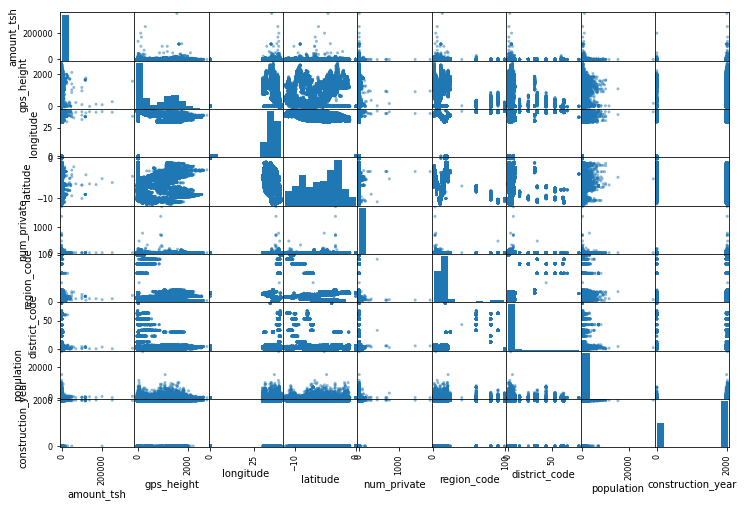

In [14]:
numeric_features = combined_df.select_dtypes(include=['int64','float64'])                                            
numeric_cols_names = list(numeric_features.columns)
numeric_cols_names.pop(0)
pd.plotting.scatter_matrix(combined_df[numeric_cols_names],figsize=(12,8));

In [15]:
combined_df[numeric_cols_names].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
# construction_year for 20709 is 0 ==> fix this?
combined_df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [8]:
combined_df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2013-01-01      1
2011-09-27      1
2011-09-06      1
2011-09-09      1
2011-09-21      1
Name: date_recorded, Length: 356, dtype: int64

In [9]:
#combined_df[['date_recorded','construction_year']]
#combined_df['rev_date_record'] = pd.to_datetime(combined_df['date_recorded'])
#combined_df['rev_construction_year'] = pd.to_datetime(combined_df['construction_year'])
#combined_df[combined_df['construction_year'] == 0]
combined_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [10]:
# split categorical features for from numerical
categorical_features = combined_df.select_dtypes(include=['object'])
numerical_features = combined_df.select_dtypes(include=['int64','float64'])

In [20]:
print('===== Categorical EDA ===='*3)

===== Categorical EDA ========= Categorical EDA ========= Categorical EDA ====


In [11]:
# Select which categorical features to include
categorical_columns = list(categorical_features.columns)
print(categorical_columns)
print(len(categorical_columns))

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
31


In [12]:
num = 30
print(categorical_columns[num])
print(categorical_features[categorical_columns[num]].value_counts())

possible_cat_features_include = ['date_recorded','basin','region','public_meeting',
                          'scheme_management',
                   'permit','extraction_type','extraction_type_group',
                   'extraction_type_class','management','management_group',
                   'payment','payment_type','water_quality','quality_group',
                   'quantity','quantity_group','source','source_type','source_class',
                   'waterpoint_type','waterpoint_type_group','status_group']


cat_features_exclude = ['funder','installer','wpt_name','subvillage','lga','ward',
                   'recorded_by','scheme_name']

not_sure = []
#print(len(maybe_include_features)+len(exclude_features))

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


In [10]:
categorical_features[categorical_columns[num]].isna().sum()

0

In [13]:
# compare the following categorical features to if they have the same information
# 'extraction_type','extraction_type_group','extraction_type_class'

# ==> use extraction_type_class and drop the other two 

extraction = combined_df[['extraction_type','extraction_type_group','extraction_type_class']]

extraction[extraction['extraction_type'] == extraction['extraction_type_group']]


#extraction.loc[:,['extraction_type','extraction_type_group','extraction_type_class']]


cat_cols_to_drop = ['extraction_type','extraction_type_group']


In [47]:
# 'management','management_group'

management = combined_df[['management','management_group']]
print(management['management_group'].value_counts())
print('='*40)
print(management['management'].value_counts())

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


In [14]:
# 'payment','payment_type'

# ==> use 'payment_type' and drop 'payment'
cat_cols_to_drop.append('payment')

payment = combined_df[['payment','payment_type']]
payment[payment['payment'] != payment['payment_type']]

#payment['payment_type'].value_counts()

,payment,payment_type
0,pay annually,annually
2,pay per bucket,per bucket
5,pay per bucket,per bucket
11,pay when scheme fails,on failure
13,pay monthly,monthly
...,...,...
59394,pay monthly,monthly
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly


In [15]:
# 'water_quality','quality_group'

# ==> use water quality and drop quality_group
cat_cols_to_drop.append('quality_group')

water_quality = combined_df[['water_quality','quality_group']]
water_quality[water_quality['water_quality'] != water_quality['quality_group']]

print(water_quality['water_quality'].value_counts())
print('='*30)
print(water_quality['quality_group'].value_counts())

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


In [16]:
# 'quantity','quantity_group'

# ==> use quantity and drop quantity_group
cat_cols_to_drop.append('quantity_group')

quantity = combined_df[['quantity','quantity_group']]
quantity[quantity['quantity'] == quantity['quantity_group']]

#quantity['quantity'].value_counts()

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [17]:
# 'source','source_type','source_class'

# ==> keep 'source' and 'source_class' and drop 'source_type'

source = combined_df[['source','source_type','source_class']]
source[source['source'] != source['source_type']]
cat_cols_to_drop.append('source_type')

print(source['source'].value_counts())
print('='*30)
print(source['source_type'].value_counts())
print('='*30)
print(source['source_class'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


In [18]:
# 'waterpoint_type','waterpoint_type_group'

# keep 'water_type' and drop 'water_type_group'
cat_cols_to_drop.append('waterpoint_type_group')

waterpoint = combined_df[['waterpoint_type','waterpoint_type_group']]
waterpoint[waterpoint['waterpoint_type'] != waterpoint['waterpoint_type_group']]

print(waterpoint['waterpoint_type'].value_counts())
print('='*40)
print(waterpoint['waterpoint_type_group'].value_counts())

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


In [31]:
print('======= End of Categorical EDA ======='*2)

======= End of Categorical EDA ============== End of Categorical EDA =======


In [32]:
print('=========== Numerical EDA ============' * 2)


=========== Numerical EDA ======================= Numerical EDA ============


In [53]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 4.5 MB


In [19]:
numerical_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [20]:
# id

# ==> drop this column 'id'
numerical_features['id']

num_cols_to_drop = ['id']

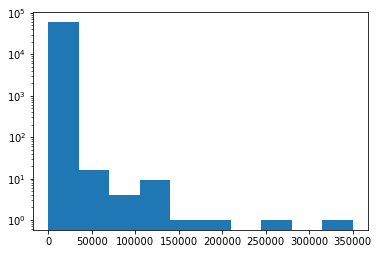

In [36]:
plt.hist(data=numerical_features, x='amount_tsh',bins=10,log=True);


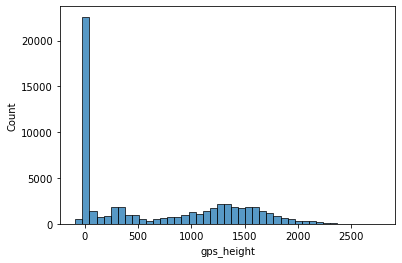

In [37]:
sns.histplot(data=numerical_features, x='gps_height');

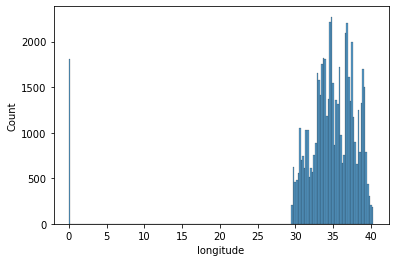

In [38]:
sns.histplot(data=numerical_features, x='longitude');

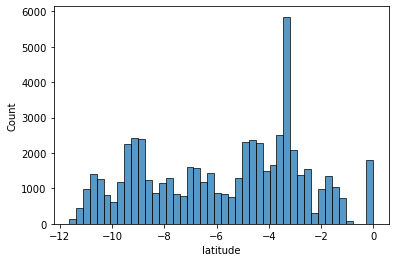

In [39]:
sns.histplot(data=numerical_features, x='latitude');

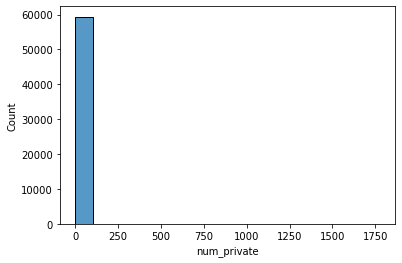

In [55]:
# 'num_private'
# ==> drop 'num_private'
num_cols_to_drop.append('num_private')

sns.histplot(data=numerical_features, x='num_private');


In [41]:
numerical_features['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

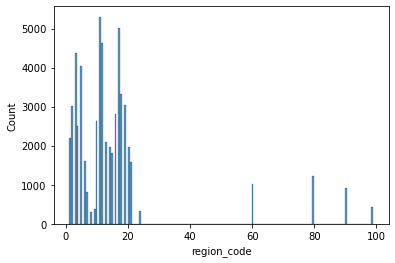

In [42]:
sns.histplot(data=numerical_features, x='region_code');

In [43]:
numerical_features['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

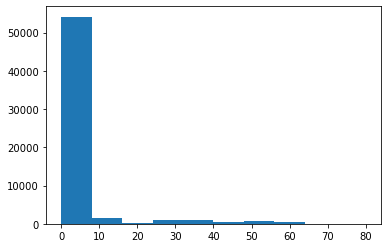

In [44]:
#sns.histplot(data=numerical_features, x='district_code')
plt.hist(data=numerical_features, x='district_code');

In [45]:
numerical_features['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

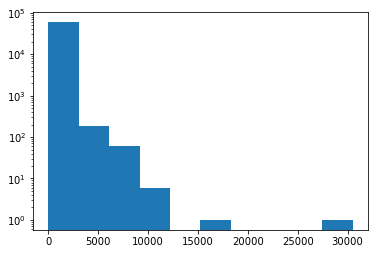

In [46]:
#sns.histplot(data=numerical_features, x='population')
plt.hist(data=numerical_features, x='population',log=True);

<AxesSubplot:xlabel='construction_year', ylabel='Count'>

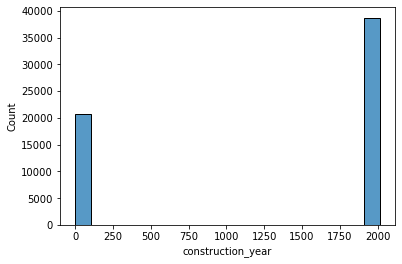

In [47]:
# ==> need to fix construction_year 

sns.histplot(data=numerical_features, x='construction_year')

In [48]:
print('========End of Numerical features EDA ====================================')

========End of Numerical features EDA ====================================


['extraction_type', 'extraction_type_group', 'payment', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group']
['id', 'num_private']


In [27]:
# include the following categorical and numerical features based on EDA

cols_to_drop = ['extraction_type', 'extraction_type_group', 'payment', 
                'quality_group', 'quantity_group', 'source_type', 
                'waterpoint_type_group','funder','installer','wpt_name',
                'subvillage','lga','ward','recorded_by','scheme_name','id', 
                'num_private']

keep_columns = [col for col in combined_df.columns if(col not in cols_to_drop)]

combined_final_df = combined_df[keep_columns].copy()

combined_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   region_code            59400 non-null  int64  
 8   district_code          59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         56066 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  permit                 56344 non-null  object 
 13  construction_year      59400 non-null  int64  
 14  extraction_type_class  59400 non-null  object 
 15  ma

construction year greater 0:  0.6513636363636364
construction year = 0: 0.34863636363636363


4771.0

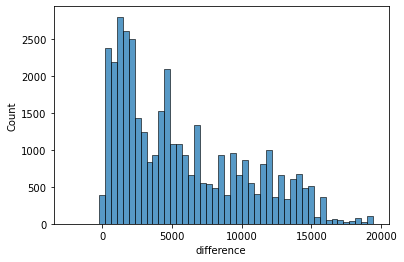

In [28]:
# change date_recorded and construction year to ordinal
date_df = combined_final_df[['date_recorded','construction_year']].copy()
date_df['rev_construction_year'] = date_df[
    'construction_year'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)

date_df['rev_date_recorded'] = date_df[
    'date_recorded'].map(lambda x: pd.to_datetime(x).toordinal())
above_zero = date_df[date_df['construction_year'] > 0].copy()
print('construction year greater 0: ', len(above_zero)/len(date_df))
print('construction year = 0:',date_df['rev_construction_year'].isna().sum()/len(date_df))
above_zero['difference'] = above_zero['rev_date_recorded'] - above_zero['rev_construction_year']
sns.histplot(data=above_zero,x='difference');
difference = above_zero['rev_date_recorded'].median() - above_zero['rev_construction_year'].median()
difference

In [29]:
# Create a new column 'rev_construction_year' and if year greater than zero 
# change to ordinal and if equal to zero
combined_final_df['rev_date_recorded'] = combined_final_df[
    'date_recorded'].map(lambda x: pd.to_datetime(x).toordinal())
combined_final_df['rev_construction_year'] = combined_final_df[
    'construction_year'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)

combined_final_df.rev_construction_year.fillna(
    value=(combined_final_df.rev_date_recorded - difference),inplace=True)

combined_final_df[['date_recorded','rev_date_recorded',
                   'construction_year','rev_construction_year']]



,date_recorded,rev_date_recorded,construction_year,rev_construction_year
0,2011-03-14,734210,1999,729755.0
1,2013-03-06,734933,2010,733773.0
2,2013-02-25,734924,2009,733408.0
3,2013-01-28,734896,1986,725007.0
4,2011-07-13,734331,0,729560.0
...,...,...,...,...
59395,2013-05-03,734991,1999,729755.0
59396,2011-05-07,734264,1996,728659.0
59397,2011-04-11,734238,0,729467.0
59398,2011-03-08,734204,0,729433.0


In [30]:
# create a 'rev_status' colum, assign 0 if 'status_group' equals functional
# and assign 1 if 'status_grou' eqauls not functional or functional needs repair 
combined_final_df['rev_status'] = combined_final_df['status_group'].map(lambda x: 0 if(x == 'functional') else 1)
combined_final_df['rev_status'].value_counts()

0    32259
1    27141
Name: rev_status, dtype: int64

In [31]:
combined_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   region_code            59400 non-null  int64  
 8   district_code          59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         56066 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  permit                 56344 non-null  object 
 13  construction_year      59400 non-null  int64  
 14  extraction_type_class  59400 non-null  object 
 15  ma

In [32]:
# drop redundent columns 'construction_year', 'status_groups' and date_recorded
# split dataframe into features and target copies
final_features = combined_final_df.drop(['construction_year','status_group',
                                   'rev_status','date_recorded'],axis=1).copy()
final_target = combined_final_df['rev_status'].copy()
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   district_code          59400 non-null  int64  
 8   population             59400 non-null  int64  
 9   public_meeting         56066 non-null  object 
 10  scheme_management      55523 non-null  object 
 11  permit                 56344 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  management             59400 non-null  object 
 14  management_group       59400 non-null  object 
 15  pa

In [33]:
X_train, X_test, y_train, y_test = train_test_split(final_features,
                                                   final_target,
                                                   random_state=1234,
                                                   stratify=final_target)

In [34]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.543075
1    0.456925
Name: rev_status, dtype: float64
0    0.543098
1    0.456902
Name: rev_status, dtype: float64


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   longitude              44550 non-null  float64
 3   latitude               44550 non-null  float64
 4   basin                  44550 non-null  object 
 5   region                 44550 non-null  object 
 6   region_code            44550 non-null  int64  
 7   district_code          44550 non-null  int64  
 8   population             44550 non-null  int64  
 9   public_meeting         42074 non-null  object 
 10  scheme_management      41631 non-null  object 
 11  permit                 42277 non-null  object 
 12  extraction_type_class  44550 non-null  object 
 13  management             44550 non-null  object 
 14  management_group       44550 non-null  object 
 15

In [36]:
X_train_nums = X_train.select_dtypes(['float64','int64'])
X_train_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   longitude              44550 non-null  float64
 3   latitude               44550 non-null  float64
 4   region_code            44550 non-null  int64  
 5   district_code          44550 non-null  int64  
 6   population             44550 non-null  int64  
 7   rev_date_recorded      44550 non-null  int64  
 8   rev_construction_year  44550 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.4 MB


In [37]:
X_train_cats = X_train.select_dtypes('object')
X_train_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   basin                  44550 non-null  object
 1   region                 44550 non-null  object
 2   public_meeting         42074 non-null  object
 3   scheme_management      41631 non-null  object
 4   permit                 42277 non-null  object
 5   extraction_type_class  44550 non-null  object
 6   management             44550 non-null  object
 7   management_group       44550 non-null  object
 8   payment_type           44550 non-null  object
 9   water_quality          44550 non-null  object
 10  quantity               44550 non-null  object
 11  source                 44550 non-null  object
 12  source_class           44550 non-null  object
 13  waterpoint_type        44550 non-null  object
dtypes: object(14)
memory usage: 5.1+ MB


In [38]:
# use this function to plot ROC curve 
def plot_roc_curve(y_train,y_predict,model_name):
    #fig,ax = plt.subplots(figsize=(10,10))
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Base Model')
    display.plot();     

In [113]:
#impute = SimpleImputer(strategy='most_frequent')
#X_train_cats_imputed = impute.fit_transform(X_train_cats)
#ss = OneHotEncoder(drop='first',sparse=False)
#X_train_cats_imputed_encoded = ss.fit_transform(X_train_cats_imputed)
#pd.DataFrame(X_train_cats_imputed_encoded)

In [41]:
# Setup numerical and categorical pipeline and incorporate both into
# ColumnTransformer
num_pipeline = Pipeline(steps=[
    ('num_impute',SimpleImputer(strategy='median')),
    ('num_ss',StandardScaler())])

cat_pipeline = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('cat_ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

cat_pipeline2 = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('cat_ord',OrdinalEncoder())])

trans = ColumnTransformer(transformers=[
    ('numerical',num_pipeline,X_train_nums.columns),
    ('categorical',cat_pipeline,X_train_cats.columns)])

trans2 = ColumnTransformer(transformers=[
    ('numerical',num_pipeline,X_train_nums.columns),
    ('categorical',cat_pipeline,X_train_cats.columns)])


Validation train mean recall score: 0.0
Validation train mean accuracy score: 0.5430751964085297
Validation train mean fit time: 4.609108304977417
Validation train mean score time: 0.06706461906433106
Train recall score: 0.0
Train accuracy score: 0.5430751964085297


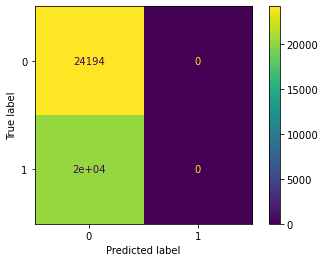

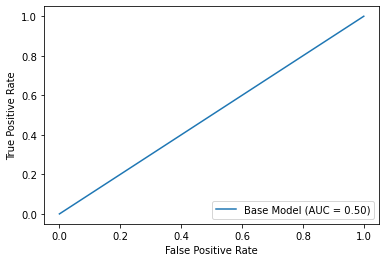

In [186]:
# Fit base_model, do validation on train and predict score for test
# Plot confusion matrix and ROC curve for base_model

base_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('dummy_model',DummyClassifier(random_state=1234,strategy='prior'))])

base_model_pipe.fit(X_train,y_train)
y_train_base_pred = base_model_pipe.predict(X_train)
scores = cross_validate(base_model_pipe,X_train,y_train,scoring=['recall',
                                                                'accuracy'])
fit_time = 'fit_time'
score_time = 'score_time'
recall = 'test_recall'
accuracy = 'test_accuracy'
print(f'Validation train mean recall score: {scores[recall].mean()}')
print(f'Validation train mean accuracy score: {scores[accuracy].mean()}')
print(f'Validation train mean fit time: {scores[fit_time].mean()}')
print(f'Validation train mean score time: {scores[score_time].mean()}')
print('='*40)
print(f'Train recall score: {recall_score(y_train,y_train_base_pred)}')
print(f'Train accuracy score: {base_model_pipe.score(X_train, y_train)}')
print('='*40)
#y_test_base_pred = base_model_pipe.predict(X_test)
#print(f'Test recall score: {recall_score(y_test,y_test_base_pred)}')
#print(f'Test accuracy score: {baseline_model_pipe.score(X_test,y_test)}')
print('='*40)
plot_confusion_matrix(base_model_pipe,X_train,y_train);
plot_roc_curve(y_train,y_train_base_pred,'Base_model')

Train recall score: 0.7512277771906228
Train accuracy score: [0.77564534 0.5430752  0.77564534 0.5430752  0.77564534 0.5430752
 0.77564534 0.5430752 ]
Best paramets: {'dtree_model__max_depth': 60, 'dtree_model__max_features': 'auto', 'dtree_model__min_impurity_decrease': 0}
[[24168    26]
 [   87 20269]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtree_model__max_depth,param_dtree_model__max_features,param_dtree_model__min_impurity_decrease,params,split0_test_recall,split1_test_recall,...,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"[4.519736433029175, 4.4302980422973635, 4.4730...","[0.02418106475911555, 0.006207256974403478, 0....","[0.06265363693237305, 0.05885787010192871, 0.0...","[0.002214951173970635, 0.00034019126219848525,...","[60, 60, 60, 60, 90, 90, 90, 90]","[auto, auto, sqrt, sqrt, auto, auto, sqrt, sqrt]","[0, 0.3, 0, 0.3, 0, 0.3, 0, 0.3]","[{'dtree_model__max_depth': 60, 'dtree_model__...","[0.7585952848722987, 0.0, 0.7585952848722987, ...","[0.7415868337017931, 0.0, 0.7415868337017931, ...",...,"[0.006252231922464575, 0.0, 0.0062522319224645...","[1, 5, 1, 5, 1, 5, 1, 5]","[0.7758698092031425, 0.5429854096520763, 0.775...","[0.7722783389450056, 0.5430976430976431, 0.772...","[0.7737373737373737, 0.5430976430976431, 0.773...","[0.7801346801346801, 0.5430976430976431, 0.780...","[0.7762065095398428, 0.5430976430976431, 0.776...","[0.775645342312009, 0.5430751964085297, 0.7756...","[0.0026644513087719624, 4.489337822670691e-05,...","[1, 5, 1, 5, 1, 5, 1, 5]"


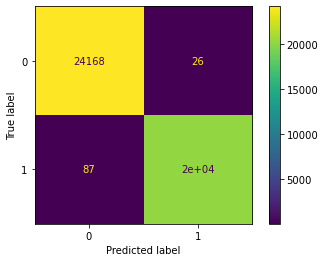

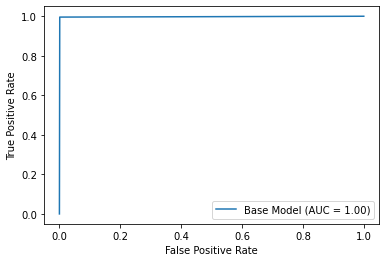

In [213]:


dt_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('dtree_model',DecisionTreeClassifier(random_state=1234))])

dt_parameters = {
    'dtree_model__max_depth': [60,90],   #tried 3,5,10,30,60(best),90
    'dtree_model__min_impurity_decrease' : [0,0.3],
    'dtree_model__max_features' : ['auto','sqrt']
}

dtree_grid_model = GridSearchCV(estimator = dt_model_pipe,
                          param_grid=dt_parameters,refit='recall',
                         scoring=['recall','accuracy'])

dtree_grid_model.fit(X_train,y_train)
y_train_dt_pred = dtree_grid_model.predict(X_train)
cv_results = pd.DataFrame([dtree_grid_model.cv_results_])
accuracy = 'mean_test_accuracy'
print('='*40)
print(f'Train recall score: {dtree_grid_model.best_score_}')
print(f'Train accuracy score: {cv_results[accuracy].mean()}')
print(f'Best paramets: {dtree_grid_model.best_params_}')
print('='*40)
print(confusion_matrix(y_train,y_train_dt_pred))
plot_confusion_matrix(dtree_grid_model,X_train,y_train);
plot_roc_curve(y_train,y_train_dt_pred,'Decision Tree')
cv_results


In [174]:
cv_results['mean_test_accuracy'].mean()
cv_results['mean_test_recall'].mean()

array([0.48840616, 0.        , 0.        , 0.61156458, 0.        ,
       0.        , 0.74764165, 0.        , 0.        ])

Train recall score: 0.7482311394168055
Train accuracy score: [0.79095398 0.78754209 0.79095398 0.78751964 0.79093154 0.78749719]
Best paramets: {'knn_model__leaf_size': 15, 'knn_model__n_neighbors': 3, 'knn_model__weights': 'distance'}
[[24155    39]
 [   78 20278]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn_model__leaf_size,param_knn_model__n_neighbors,param_knn_model__weights,params,split0_test_recall,split1_test_recall,...,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"[5.607071399688721, 5.604489135742187, 5.48618...","[0.05675349575614666, 0.008115212635503638, 0....","[5.671726655960083, 5.437765741348267, 6.14998...","[0.07403888933454872, 0.03056153992905632, 0.0...","[15, 15, 30, 30, 45, 45]","[3, 3, 3, 3, 3, 3]","[uniform, distance, uniform, distance, uniform...","[{'knn_model__leaf_size': 15, 'knn_model__n_ne...","[0.7409135559921415, 0.7551571709233792, 0.740...","[0.7442888725128961, 0.7487103905674282, 0.744...",...,"[0.0027771930504541663, 0.005750029714524, 0.0...","[5, 1, 5, 3, 4, 1]","[0.7915824915824916, 0.7920314253647587, 0.791...","[0.7920314253647587, 0.7866442199775533, 0.791...","[0.7892255892255893, 0.7848484848484848, 0.789...","[0.7920314253647587, 0.7885521885521886, 0.792...","[0.7898989898989899, 0.7856341189674523, 0.789...","[0.7909539842873177, 0.7875420875420875, 0.790...","[0.0011676594212022256, 0.0025642333689777567,...","[1, 4, 1, 5, 3, 6]"


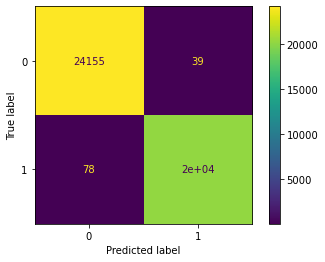

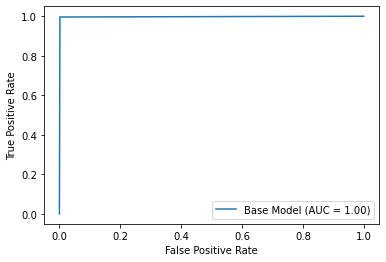

In [215]:
knn_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('knn_model',KNeighborsClassifier())])

knn_parameters = {
    'knn_model__n_neighbors' : [3], #tried 3(best),5,10
    'knn_model__weights' : ['uniform','distance'],   #tried ['uniform','distance'] distance(best)
    'knn_model__leaf_size' : [15,30,45]
}

knn_grid_model = GridSearchCV(estimator = knn_model_pipe,
                          param_grid=knn_parameters,refit='recall',
                          scoring=['recall','accuracy'])

knn_grid_model.fit(X_train,y_train)
y_train_knn_pred = knn_grid_model.predict(X_train)
cv_results = pd.DataFrame([knn_grid_model.cv_results_])
accuracy = 'mean_test_accuracy'
print('='*40)
print(f'Train recall score: {knn_grid_model.best_score_}')
print(f'Train accuracy score: {cv_results[accuracy].mean()}')
print(f'Best paramets: {knn_grid_model.best_params_}')
print('='*40)
print(confusion_matrix(y_train,y_train_knn_pred))
plot_confusion_matrix(knn_grid_model,X_train,y_train);
plot_roc_curve(y_train,y_train_knn_pred,'k-Nearest Neighbors')
cv_results


/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Train recall score: 0.6290527807256174
Train accuracy score: [0.75196409 0.75171717 0.75191919        nan        nan 0.75196409
        nan        nan        nan 0.75196409 0.75191919 0.75191919
        nan        nan 0.75196409        nan        nan        nan
 0.75196409 0.75191919 0.75191919        nan        nan 0.75196409
        nan        nan        nan 0.75196409 0.75180696 0.75200898
        nan        nan 0.75196409        nan        nan        nan
 0.75196409 0.75198653 0.75200898        nan        nan 0.75196409
        nan        nan        nan 0.75196409 0.75198653 0.75200898
        nan        nan 0.75196409        nan        nan        nan
 0.75196409 0.75162738 0.75191919        nan        nan 0.75196409
        nan        nan        nan 0.75196409 0.75189675 0.75191919
        nan        nan 0.75196409        nan        nan        nan
 0.75196409 0.75189675 0.75191919        nan        nan 0.75196409
        nan        nan        nan]
Best paramets: {'lr_model__C': 10

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr_model__C,param_lr_model__max_iter,param_lr_model__penalty,param_lr_model__random_state,param_lr_model__solver,params,...,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"[17.4881733417511, 5.129543972015381, 5.897467...","[6.106052729454943, 0.023078494673672515, 0.20...","[0.0651425838470459, 0.05961027145385742, 0.05...","[0.002984149762848, 0.0027233883800967564, 0.0...","[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[l2, l2, l2, l1, l1, l1, elasticnet, elasticne...","[1234, 1234, 1234, 1234, 1234, 1234, 1234, 123...","[newton-cg, lbfgs, liblinear, newton-cg, lbfgs...","[{'lr_model__C': 1000.0, 'lr_model__max_iter':...",...,"[0.004111016664589277, 0.004659305133816333, 0...","[12, 35, 24, 54, 55, 1, 56, 57, 58, 12, 24, 24...","[0.7502805836139169, 0.7498316498316498, 0.750...","[0.752300785634119, 0.7517396184062851, 0.7523...","[0.7503928170594837, 0.7505050505050505, 0.750...","[0.7507295173961841, 0.7502805836139169, 0.750...","[0.7561167227833895, 0.7562289562289563, 0.756...","[0.7519640852974188, 0.7517171717171717, 0.751...","[0.002199317389704331, 0.00234285805488512, 0....","[6, 35, 24, 54, 55, 15, 56, 57, 58, 6, 24, 24,..."


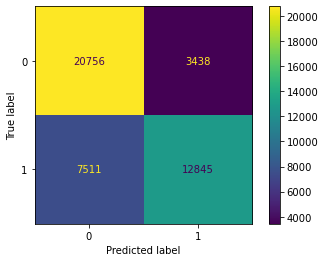

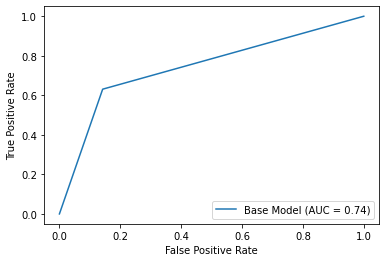

In [43]:
lr_model_pipe = Pipeline(steps=[
    ('trans2',trans2),
    ('lr_model',LogisticRegression())])

lr_parameters = {
    #'trans__numerical__num_ss__with_mean' : [False],  #tried True
    'lr_model__penalty' : ['l2','l1','elasticnet'],
    'lr_model__random_state' : [1234],
    'lr_model__C' : [1e3,1e6,1e9],  #tried 1e-3,1,10e3 and 10e9
    'lr_model__max_iter' : [1e2,1e3,1e4],  #tried 1e4
    'lr_model__solver' : ['newton-cg','lbfgs','liblinear'] #tried also  and 
}

lr_grid_model = GridSearchCV(estimator = lr_model_pipe,
                          param_grid=lr_parameters,refit='recall',
                          scoring=['recall','accuracy'])

lr_grid_model.fit(X_train,y_train)
y_train_lr_pred = lr_grid_model.predict(X_train)
cv_results = pd.DataFrame([lr_grid_model.cv_results_])
accuracy = 'mean_test_accuracy'
print('='*40)
print(f'Train recall score: {lr_grid_model.best_score_}')
print(f'Train accuracy score: {cv_results[accuracy].mean()}')
print(f'Best paramets: {lr_grid_model.best_params_}')
print('='*40)
print(confusion_matrix(y_train,y_train_lr_pred))
plot_confusion_matrix(lr_grid_model,X_train,y_train);
plot_roc_curve(y_train,y_train_lr_pred,'Logistic Regression')
cv_results

In [199]:
a=1e3
a

1000.0

In [153]:
a = pd.to_datetime('2022-01-01').toordinal()
print(a)
b = pd.to_datetime('2022').toordinal()
print(b)

738156
738156


In [205]:
import pandas as pd
import numpy as np
data = [(3,5,7), (2,4,6),(5,8,9)]
df = pd.DataFrame(data, columns = ['A','B','C'])
print(df)


   A  B  C
0  3  5  7
1  2  4  6
2  5  8  9


In [207]:
df2 = df.apply(lambda x: np.square(x) if x.name in ['A'] else x)
df2

,A,B,C
0,9,5,7
1,4,4,6
2,25,8,9


In [270]:
df['D'] = df[['A','B']].apply(lambda x: x)
df

,A,B,C,D
0,3,5,7,3
1,2,4,6,2
2,5,8,9,5


In [271]:
# importing pandas library
import pandas as pd
  
# creating and initializing a list
values= [['Rohan',455],['Elvish',250],['Deepak',495],
         ['Soni',400],['Radhika',350],['Vansh',450]]

# creating a pandas dataframe
df = pd.DataFrame(values,columns=['Name','Total_Marks'])

df

,Name,Total_Marks
0,Rohan,455
1,Elvish,250
2,Deepak,495
3,Soni,400
4,Radhika,350
5,Vansh,450


In [284]:

 

 
# Applying lambda function to find
# percentage of 'Total_Marks' column
# using df.assign()
df = df.assign(Product=lambda x: (x['Total_Marks'] /500 * 100))
 
# displaying the data frame
df

KeyError: 'Total_Marks'

In [276]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np

# creating and initializing a nested list
values_list = [[1.5, 2.5, 10.0], [2.0, 4.5, 5.0], [2.5, 5.2, 8.0],
			[4.5, 5.8, 4.8], [4.0, 6.3, 70], [4.1, 6.4, 9.0],
			[5.1, 2.3, 11.1]]

# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
				index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df

,Field_1,Field_2,Field_3
a,1.5,2.5,10.0
b,2.0,4.5,5.0
c,2.5,5.2,8.0
d,4.5,5.8,4.8
e,4.0,6.3,70.0
f,4.1,6.4,9.0
g,5.1,2.3,11.1


In [7]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np

# creating and initializing a nested list
values_list = [[1.5, 2.5, 10.0], [2.0, 4.5, 5.0], [2.5, 5.2, 8.0],
			[4.5, 5.8, 4.8], [4.0, 6.3, 70], [4.1, 6.4, 9.0],
			[5.1, 2.3, 11.1]]

# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
				index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df






,Field_1,Field_2,Field_3
a,1.5,2.5,10.0
b,2.0,4.5,5.0
c,2.5,5.2,8.0
d,4.5,5.8,4.8
e,4.0,6.3,70.0
f,4.1,6.4,9.0
g,5.1,2.3,11.1


In [22]:
# Apply function numpy.square() to square
# the values of 2 rows only i.e. with row
# index name 'b' and 'f' only
df = df.apply(lambda x: np.square(x) if x.name in ['b', 'f'] else x, axis=1)

df


,Field_1,Field_2,Field_3,Product
a,1.50,2.50,10.0,37.5000
b,4.00,20.25,25.0,2025.0000
c,2.50,5.20,8.0,104.0000
d,4.50,5.80,4.8,125.2800
e,4.00,6.30,70.0,1764.0000
f,16.81,40.96,81.0,55771.5456
g,5.10,2.30,11.1,130.2030


In [39]:
df['x'] = df[['Field_1','Field_2']].apply(lambda x: None)
df

,Field_1,Field_2,Field_3,Product,x
a,1.50,2.50,10.0,37.5000,NaN
b,4.00,20.25,25.0,2025.0000,NaN
c,2.50,5.20,8.0,104.0000,NaN
d,4.50,5.80,4.8,125.2800,NaN
e,4.00,6.30,70.0,1764.0000,NaN
f,16.81,40.96,81.0,55771.5456,NaN
g,5.10,2.30,11.1,130.2030,NaN


In [40]:
df.x.fillna(value=(df.Field_3 - 5),inplace=True)
df

,Field_1,Field_2,Field_3,Product,x
a,1.50,2.50,10.0,37.5000,5.0
b,4.00,20.25,25.0,2025.0000,20.0
c,2.50,5.20,8.0,104.0000,3.0
d,4.50,5.80,4.8,125.2800,-0.2
e,4.00,6.30,70.0,1764.0000,65.0
f,16.81,40.96,81.0,55771.5456,76.0
g,5.10,2.30,11.1,130.2030,6.1


In [9]:
# Applying lambda function to find product of 3 columns
# i.e 'Field_1', 'Field_2' and 'Field_3'
df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
df

,Field_1,Field_2,Field_3,Product
a,1.5,2.5,10.0,37.500
b,2.0,4.5,5.0,45.000
c,2.5,5.2,8.0,104.000
d,4.5,5.8,4.8,125.280
e,4.0,6.3,70.0,1764.000
f,4.1,6.4,9.0,236.160
g,5.1,2.3,11.1,130.203


In [73]:
df_date = pd.DataFrame({'date' : [1923,1948,0,1970,1980,0,1990,2000,2010,2022]})
df_date['rev_date'] = df_date['date'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)
df_date

,date,rev_date
0,1923,701996.0
1,1948,711127.0
2,0,NaN
3,1970,719163.0
4,1980,722815.0
5,0,NaN
6,1990,726468.0
7,2000,730120.0
8,2010,733773.0
9,2022,738156.0


In [81]:
df_date2 = pd.DataFrame({'date' : ['1923','1948','1970','1980','1990',
                                   '2000','2010','2022']})
df_date2['rev_date'] = df_date2['date'].map(lambda x: pd.to_datetime(x).toordinal())
df_date2

,date,rev_date
0,1923,701996
1,1948,711127
2,1970,719163
3,1980,722815
4,1990,726468
5,2000,730120
6,2010,733773
7,2022,738156


In [156]:
a = {'a' : 123, 'b' : 456}
b = pd.DataFrame([a])
b

,a,b
0,123,456
